In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pathlib import Path

In [3]:
root = r"D:\Desktop\智慧能源专项赛-赛题二数据\分布式历史发电量-202204-202210数据.xlsx"
print(Path(root).exists())
data = pd.read_excel(root).iloc[:, :5]
# 整体去除其中的Nan
data = data.dropna()
data = data.groupby("AREA_NO")

dis1 = data.get_group(1)
dis1, dis1.shape, dis1.isnull().sum()

True


(      AREA_NO      DATE  ENERGY（kW·h）  WEATHER1_IR  WEATHER2_IR
 0           1  20221031        2196.0     11207300     10647800
 12          1  20221030        2054.0      5499000      7654800
 24          1  20221029        3522.0      5104500      6839200
 36          1  20221028         411.0      3418400      5034100
 48          1  20221027         424.0      2734700      3664700
 ...       ...       ...           ...          ...          ...
 2268        1  20220425        4269.0     20432000     20010000
 2280        1  20220424        6376.0     15560900     15296700
 2292        1  20220423        4085.0      8989000      9486000
 2304        1  20220422        5452.0     19150000     18764000
 2316        1  20220421        7648.0     25477000     24474000
 
 [190 rows x 5 columns],
 (190, 5),
 AREA_NO         0
 DATE            0
 ENERGY（kW·h）    0
 WEATHER1_IR     0
 WEATHER2_IR     0
 dtype: int64)

In [4]:
# 构造训练集和验证集
power = dis1["ENERGY（kW·h）"]
features = dis1[["WEATHER1_IR", "WEATHER2_IR"]]
power.shape, features.shape

((190,), (190, 2))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, power, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((152, 2), (38, 2), (152,), (38,))

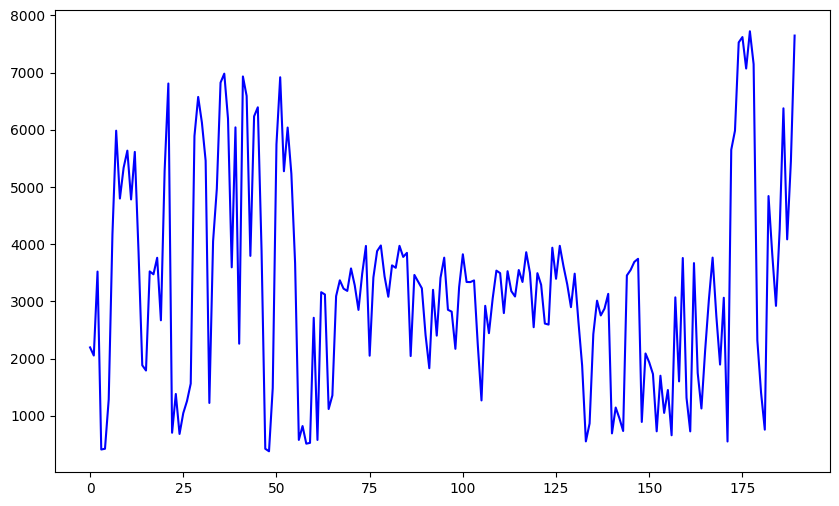

In [6]:
import matplotlib.pyplot as plt

# 查看数据分布
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(power), 1), power, color='blue', label='Original Data')

In [7]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

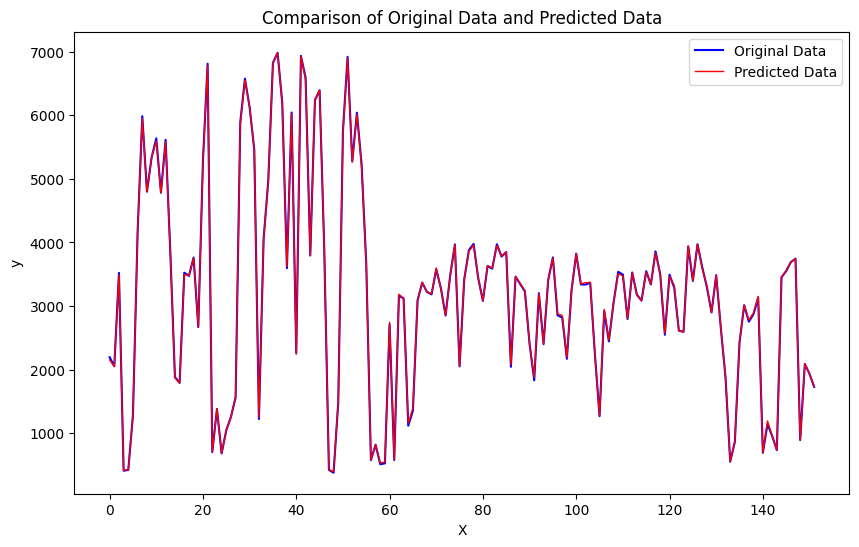

In [8]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_train)

import matplotlib.pyplot as plt

# 绘制原始数据和预测结果的对比图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(y_pred), 1), y_train, color='blue', label='Original Data')
plt.plot(np.arange(0, len(y_pred), 1), y_pred, color='red', linewidth=1, label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Original Data and Predicted Data')
plt.legend()
plt.show()

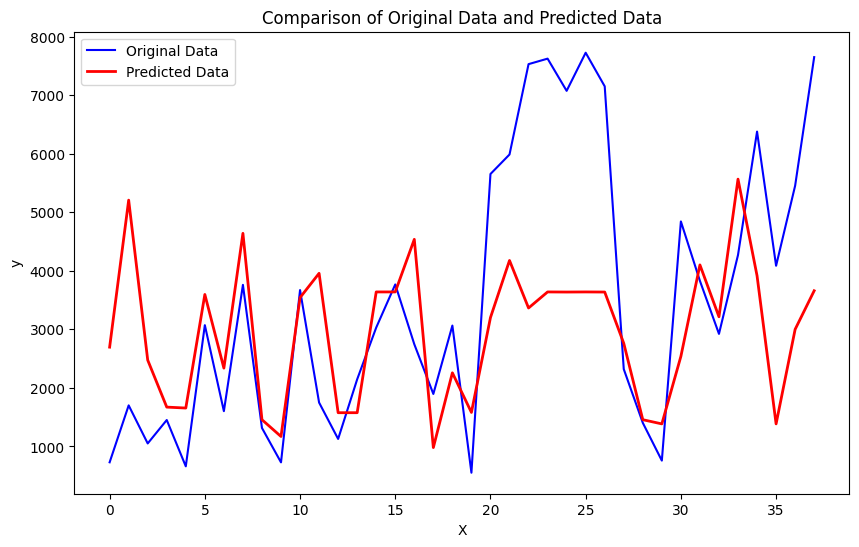

In [9]:
model_xgb = xgb.XGBRegressor(n_estimators=80, max_depth=3, min_child_weight=1,   
                             gamma=0.05, subsample=0.8, colsample_bytree=0.9, learning_rate=0.13, reg_alpha=0.8, reg_lambda=1)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

import matplotlib.pyplot as plt

# 绘制原始数据和预测结果的对比图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(y_pred), 1), y_test, color='blue', label='Original Data')
plt.plot(np.arange(0, len(y_pred), 1), y_pred, color='red', linewidth=2, label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Original Data and Predicted Data')
plt.legend()
plt.show()

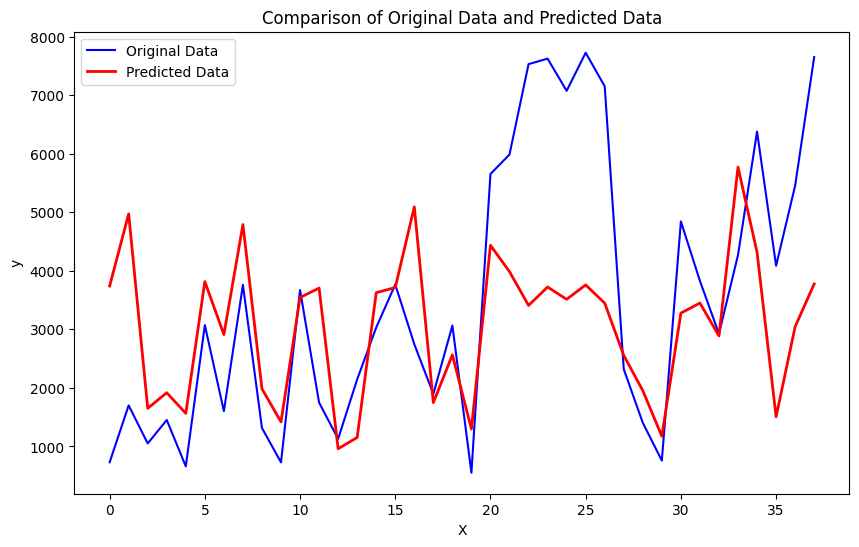

In [10]:
 # 创建随机森林回归模型对象
rf_model = RandomForestRegressor()

# 使用训练集训练模型
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


# 绘制原始数据和预测结果的对比图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(y_pred), 1), y_test, color='blue', label='Original Data')
plt.plot(np.arange(0, len(y_pred), 1), y_pred, color='red', linewidth=2, label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Original Data and Predicted Data')
plt.legend()
plt.show()